# Import biblioteka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import datetime

# Učitavanje i analiza podataka

In [2]:
X_test= pd.read_csv('X_test.txt', sep='\s+')
y_test= pd.read_csv('y_test.txt', sep='\s+')
X_train= pd.read_csv('X_train.txt', sep='\s+')
y_train= pd.read_csv('y_train.txt', sep='\s+')

In [3]:
podaci_test = pd.concat([X_test, y_test], axis=1)
podaci_train = pd.concat([X_train, y_train], axis=1)

In [4]:
podaci = pd.concat([podaci_train, podaci_test], axis=0)

In [5]:
def matrica_predv(conf_matrica):
    cm_df = pd.DataFrame(conf_matrica, index=[f"Стварна вриједност {i+1}" for i in range(6)], columns=[f"Предикција {i+1}" for i in range(6)])

    # Prikaz tabele
    return cm_df

In [6]:
def klas_izv (y_skup,X_skup_predikcija, skup):
    izvjestaj=metrics.classification_report(y_skup, X_skup_predikcija, output_dict=True)
     
    izvjestaj_df=pd.DataFrame(izvjestaj).transpose()
    izvjestaj_df['support'] = izvjestaj_df['support'].round().astype(int)
    
    izvjestaj_df = izvjestaj_df.rename(columns={
            'precision': 'Прецизност',
            'recall': 'Одзив',
            'f1-score': 'f1-score',
            'support': 'Број узорака у класи'  # Ovaj naziv se koristi za broj uzoraka u svakoj klasi
        })

    izvjestaj_df = izvjestaj_df.rename(index={
            '1': 'Пјешачење',
            '2': 'Пењање уз степенице',
            '3': 'Силазак низ степенице',
            '4': 'Сједење',
            '5': 'Стајање',
            '6': 'Лежање',
            'accuracy': 'Тачност',
            'macro avg': 'Макро просјек',  #prosečne vrijednosti metrika za sve klase, bez ponderisanja u zavisnosti od broja uzoraka u svakoj klasi.
            'weighted avg': 'Пондерисани просјек'
        })
 
   
        
    return  izvjestaj_df

# Standardizacija 

In [7]:
#Standardizacija trening skupa

# Za kolonu Class ne radi se standardizacija

# Inicijalizacija StandardScaler
scaler = StandardScaler()

# Primjena standardizacije
st_X_train = scaler.fit_transform(X_train)

# Prevođenje podataka u dataframe
st_X_train = pd.DataFrame(st_X_train, columns=X_train.columns)

st_X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.778758,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,0.159241,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,0.277877,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,-0.443978,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276


In [8]:
#Standardizacija testnog skupa

# Za kolonu Class ne radi se standardizacija

# Inicijalizacija StandardScaler
scaler = StandardScaler()

# Primjena standardizacije
st_X_test = scaler.fit_transform(X_test)

# Prevođenje podataka u dataframe
st_X_test = pd.DataFrame(st_X_test, columns=X_test.columns)


st_X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.277708,-0.210631,2.193076,-0.787267,-0.833212,-0.093444,-0.808091,-0.839013,-0.104178,-0.824746,...,-0.253663,-0.166391,-0.344765,0.003566,0.357573,-1.363900,0.575487,-0.404790,0.622723,-0.038348
1,0.198660,0.182591,-0.250264,-0.876984,-0.929061,-0.858050,-0.897145,-0.928949,-0.863269,-0.824746,...,-2.300750,0.491021,0.012257,-0.264092,0.030787,-0.747232,1.871192,-0.361739,0.636731,-0.145709
2,0.024587,-0.318055,-0.228485,-0.921598,-0.934054,-0.907107,-0.916891,-0.933813,-0.912639,-0.910982,...,-0.291563,0.274821,-0.134989,-0.119671,0.446072,0.037919,0.323938,-0.370932,0.632845,-0.126855
3,-0.061057,-0.573037,-0.213709,-0.923837,-0.940817,-0.919082,-0.919152,-0.941599,-0.927776,-0.909740,...,-0.058625,-0.210678,-0.441714,-0.066443,0.338512,0.472695,0.625874,-0.363434,0.645276,-0.117585
4,0.013823,-0.387881,-0.494639,-0.921679,-0.929036,-0.949979,-0.916133,-0.923846,-0.951396,-0.909740,...,-1.090781,-0.810527,-0.796939,-0.022276,-0.098529,1.097348,-0.201999,-0.350256,0.665657,-0.104118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.597072,-1.380212,0.217067,0.789690,0.744135,1.154623,0.740507,0.779257,1.132204,1.235951,...,-0.241427,-0.311121,-0.488935,-1.019623,0.769650,1.330760,-1.359840,-0.270682,0.616018,0.967186
2943,1.476032,-0.829444,0.057817,0.747216,1.085580,1.206230,0.695181,1.026724,1.025466,1.235951,...,-0.122855,-0.135013,-0.326438,-2.207635,-0.846487,-1.098551,0.678029,-0.277456,0.612784,0.957360
2944,1.254458,1.862441,-0.173180,0.688432,0.943345,1.057851,0.657591,0.811598,0.810778,0.896354,...,-0.850662,0.500453,0.423089,-0.555875,0.190504,1.034263,0.759011,-0.277802,0.615561,0.952271
2945,-0.601088,1.411385,0.278129,0.704246,0.563664,1.175343,0.646262,0.506579,0.971675,0.896354,...,-0.765017,0.227458,-0.061034,1.307070,-1.849401,1.400679,0.017755,-0.286369,0.585654,0.978695


# Podjela podataka za primjenu modela

In [9]:
X_train=st_X_train
X_test=st_X_test

In [10]:
#Podaci su već podijeljeni u inicijalnom učitavanju - takav je dataset
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7352, 561) (7352, 1) (2947, 561) (2947, 1)


In [11]:
#transformacija u jednodimenzionalan vektor
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Upotreba PCA

Analiza glavnih komponenti (Principal Component Analysis, PCA) je nenadgledana procedura za izgradnju novih linearno nekorelisanih atributa od postojećih. Ti nove atributi nazivaju se glavne komponente. Prva glavna komponenta je vektor koji ima najveću moguću varijansu, tj. duž ovog pravca podaci najviše variraju. Svaka sljedeća glavna komponenta je normalna u odnosu na sve prethodne i opet objašnjava najveći mogući preostali dio varijanse podataka.

Nakon ove transformacije može se uzeti prvih k glavnih komponenti i na taj način smanjiti dimenzionalnost skupa podataka, a da se izgubi što manji dio informacija.

-----***Izbor broja komponenti***-----

explained_variance_ratio_ se računa kao odnos između varijanse koju svaka glavna komponenta objašnjava i ukupne varijanse u podacima. Dakle, za svaku glavnu komponentu, izračunava se njen doprinos u objašnjenju ukupne varijanse, a ovaj odnos se zatim koristi za računanje explained_variance_ratio_.

Koraci:
1. Kreiranje kovarijantne matrice. Kovarijacija između atributa daje uvid u to koliko su atributi međusobno povezani.

2. Izračunavanje svojstvenih vrijednosti (engl. eigenvalues) i svojstvenih vektora (engl. eigenvectors) koristeći kovarijansnu matricu

3. Svojstvene vrednosti i varijansa: Svaka svojstvena vrednost (𝜆𝑖) odgovara varijansi koju objašnjava odgovarajuća glavna komponenta. Zbir svih svojstvenih vrijednosti daje ukupnu varijansu u podacima.

4. Računanje explained_variance_ratio_: Odnos između svake svojstvene vrijednosti i ukupne varijanse daje explained_variance_ratio_ za svaku komponentu.

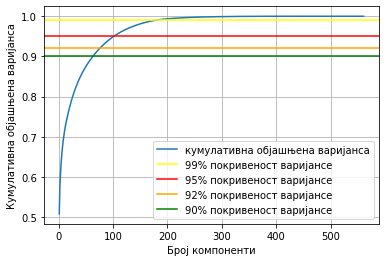

Број компоненти које објашњавају најмање 99.0% варијансе: 179
Број компоненти које објашњавају најмање 95.0% варијансе: 102
Број компоненти које објашњавају најмање 92.0% варијансе: 76
Број компоненти које објашњавају најмање 90.0% варијансе: 63


In [12]:
# Primjena PCA i izračun objašnjene varijanse
pca = PCA()
pca.fit(X_train)

# Kumulativna objašnjena varijansa
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Prikaz grafika za kumulativnu objašnjenu varijansu
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Број компоненти')
plt.ylabel('Кумулативна објашњена варијанса')
#plt.title('Kumulativna objašnjena varijansa za PCA')
plt.axhline(y=0.99, color='yellow', linestyle='-')
plt.axhline(y=0.95, color='red', linestyle='-')
plt.axhline(y=0.92, color='orange', linestyle='-')
plt.axhline(y=0.90, color='green', linestyle='-')

plt.legend(['кумулативна објашњена варијанса','99% покривеност варијансе','95% покривеност варијансе','92% покривеност варијансе','90% покривеност варијансе'])

plt.grid(True)
plt.show()

# Izbor broja komponenti koji objašnjava određeni postotak varijanse
threshold = 0.99  # Na primjer, 99% varijanse
n_components = np.argmax(explained_variance >= threshold) +1
print(f"Број компоненти које објашњавају најмање {threshold*100}% варијансе: {n_components}")

# Izbor broja komponenti koji objašnjava određeni postotak varijanse
threshold = 0.95  # Na primjer, 95% varijanse
n_components = np.argmax(explained_variance >= threshold) +1
print(f"Број компоненти које објашњавају најмање {threshold*100}% варијансе: {n_components}")

threshold = 0.92  # Na primjer, 92% varijanse
n_components = np.argmax(explained_variance >= threshold) +1
print(f"Број компоненти које објашњавају најмање {threshold*100}% варијансе: {n_components}")

threshold = 0.90  # Na primjer, 90% varijanse
n_components = np.argmax(explained_variance >= threshold) +1
print(f"Број компоненти које објашњавају најмање {threshold*100}% варијансе: {n_components}")


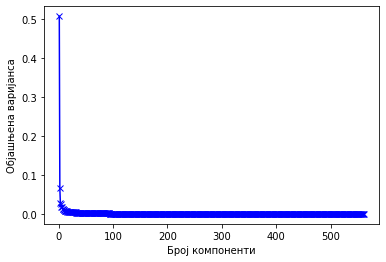

In [13]:
#scree test
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, color='blue', marker="x")
plt.xlabel('Број компоненти')
plt.ylabel('Објашњена варијанса')
plt.show()

In [14]:
def broj_komponenti_sa_sv_vecom_od_1 ():
    brojac=0
    svojstvene_vrijednosti=pca.explained_variance_
    for sv in svojstvene_vrijednosti:
        if sv>=1:
            brojac+=1
    return brojac

In [15]:
broj_komp_sa_sv_vecom_od_1 = broj_komponenti_sa_sv_vecom_od_1()
print(broj_komp_sa_sv_vecom_od_1)

61


In [16]:
def gridSearch (X_train, y_train, broj_komponenti):
    param_grid = {'penalty':['l2'],
               'C' : [0.01,0.05,0.1], 
               'solver': ['lbfgs','newton-cg','saga'],
                'multi_class': ['multinomial'],
               'max_iter'  : [1000,1200,1500],
               'class_weight':['balanced']
              }
                  
    log_model = LogisticRegression()
    grid_search = GridSearchCV(log_model,param_grid = param_grid, cv = 5, verbose=2) #ako se stavi verbose 2 ispisivaće svaki cv detaljno navodeći parametre pri svakom prolasku

    # Treniranje modela sa GridSearchCV
    grid_search.fit(X_train, y_train) ##otkomentarisati poslije

    rezultati_df = pd.DataFrame(grid_search.cv_results_)

    # Ispis najboljih parametara
    
    print(f"Најбољи параметри: {grid_search.best_params_}")  
    return grid_search.best_estimator_  

-----***Primjena PCA i logističke regresije***-----

In [17]:
def log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti):
        t1 = datetime.datetime.now()
        print('Početak izvršenja: ',t1)
        
        #Primjena PCA za dati broj komponenti
        pca = PCA(n_components=broj_komponenti)  
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        #print('Матрица добијена примјеном PCA на тестне податке \n', X_test_pca.round(6))
        #print('Компоненте тестног скупа \n',pca.components_.round(6))
        
        # podešaanje hiperparametara i definisanje modela 
        t2= datetime.datetime.now()
        print('Početak gridsearch: ',t2)
        najbolji = gridSearch(X_train_pca, y_train,broj_komponenti)
        t3= datetime.datetime.now()
        print('Kraj gridsearch: ',t3)
        print('Trajanje gridsearch u sekundama ',(t3-t2).total_seconds())
        
        
        #tačnost modela na trening podacima
        X_train_pca_predict = najbolji.predict (X_train_pca)
        tacnost_training_pca_data = metrics.accuracy_score(y_train,X_train_pca_predict).round(6)
        conf_matrica_pca_training = metrics.confusion_matrix(y_train, X_train_pca_predict)
        print('Тачност процијењених тренинг података:',tacnost_training_pca_data)
        
        #klasifikacioni izvjestaj trening skup
        display(klas_izv(y_train, X_train_pca_predict, 'тренинг'))
        
        # display(klas_izv(y_train, X_train_pca_predict, 'тренинг'))
        
        #tačnost modela na testnim podacima
        X_test_pca_predict = najbolji.predict (X_test_pca)
        tacnost_test_pca_data = metrics.accuracy_score(y_test,X_test_pca_predict).round(6)
        conf_matrica_pca = metrics.confusion_matrix(y_test, X_test_pca_predict)
        print('Тачност процијењених тестних података:',tacnost_test_pca_data)
        
        # display (matrica_predv(conf_matrica_pca))
        
        #klasifikacioni izvjestaj testni skup
        display(klas_izv(y_test, X_test_pca_predict, 'тест'))
        
        #objasnjena varijansa svake od glavnih komponenti
        print('Објашњена варијанса сваке од главних компоненти:',pca.explained_variance_.round(6)) 

        #postotak objasnjene varijanse svake od glavnih komponenti
        print('Постотак објашњене варијансе сваке од главних компоненти:',pca.explained_variance_ratio_.round(6) )
        print('Укупни проценат кумулативне објашњене варијансе ', sum(pca.explained_variance_ratio_).round(6)*100)
        
        t4 = datetime.datetime.now()
        print('Kraj izvršenja: ',t4)
        print('Trajanje izvršenja u sekundama ',(t4-t1).total_seconds())


In [18]:
log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti=179)

Početak izvršenja:  2025-04-20 21:32:54.889430
Početak gridsearch:  2025-04-20 21:32:56.286978
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l

[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   2.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   2.0s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.7s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   2.4s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   2.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   2.3s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=  19.0s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; t

[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  26.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  29.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  15.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  29.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  31.5s
Најбољи параметри: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Kraj gridsearch:  2025-04-20 21:48:54.297367
Trajanje gridsearch u sekundama  958.010389
Тачност процијењених тренинг података: 0.986262


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,1.000000,1.000000,1.000000,1226
Пењање уз степенице,1.000000,1.000000,1.000000,1073
Силазак низ степенице,1.000000,1.000000,1.000000,986
Сједење,0.960373,0.961120,0.960746,1286
Стајање,0.963583,0.962882,0.963233,1374
Лежање,1.000000,1.000000,1.000000,1407
Тачност,0.986262,0.986262,0.986262,1
Макро просјек,0.987326,0.987334,0.987330,7352
Пондерисани просјек,0.986263,0.986262,0.986262,7352


Тачност процијењених тестних података: 0.949779


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.971660,0.967742,0.969697,496
Пењање уз степенице,0.956067,0.970276,0.963119,471
Силазак низ степенице,0.966507,0.961905,0.964200,420
Сједење,0.909651,0.902240,0.905930,491
Стајање,0.898711,0.917293,0.907907,532
Лежање,1.000000,0.981378,0.990602,537
Тачност,0.949779,0.949779,0.949779,1
Макро просјек,0.950433,0.950139,0.950243,2947
Пондерисани просјек,0.950097,0.949779,0.949893,2947


Објашњена варијанса сваке од главних компоненти: [2.84921131e+02 3.69226380e+01 1.57462520e+01 1.40490860e+01
 1.05947200e+01 9.67299200e+00 7.69242100e+00 6.72774100e+00
 5.58753200e+00 5.41487200e+00 4.82554600e+00 4.49018700e+00
 4.28660300e+00 3.62078800e+00 3.54782200e+00 3.36489900e+00
 3.29211700e+00 3.22847500e+00 3.18647000e+00 2.95853200e+00
 2.80741800e+00 2.74034400e+00 2.68309900e+00 2.62899600e+00
 2.52085600e+00 2.36228400e+00 2.34517900e+00 2.27555900e+00
 2.17991700e+00 2.17146700e+00 2.05330900e+00 1.98931500e+00
 1.95222400e+00 1.89187700e+00 1.84974000e+00 1.84153700e+00
 1.79841500e+00 1.65862500e+00 1.60873200e+00 1.59948600e+00
 1.50798400e+00 1.49033000e+00 1.47790900e+00 1.45234900e+00
 1.39738800e+00 1.38560100e+00 1.35039800e+00 1.32478600e+00
 1.29204000e+00 1.27682600e+00 1.23529200e+00 1.19771300e+00
 1.16538100e+00 1.13616100e+00 1.12091500e+00 1.10953200e+00
 1.09002300e+00 1.06737600e+00 1.05518800e+00 1.04481400e+00
 1.01816600e+00 9.95243000e-01 9.879

In [19]:
log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti=102)

Početak izvršenja:  2025-04-20 21:48:54.360932
Početak gridsearch:  2025-04-20 21:48:55.248309
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l

[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.7s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=  12.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; t

[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  17.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  16.5s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   7.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  16.3s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  17.1s
Најбољи параметри: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Kraj gridsearch:  2025-04-20 21:58:24.924884
Trajanje gridsearch u sekundama  569.676575
Тачност процијењених тренинг података: 0.979869


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,1.000000,0.999184,0.999592,1226
Пењање уз степенице,0.999069,1.000000,0.999534,1073
Силазак низ степенице,1.000000,1.000000,1.000000,986
Сједење,0.939768,0.946345,0.943045,1286
Стајање,0.949451,0.943231,0.946331,1374
Лежање,1.000000,1.000000,1.000000,1407
Тачност,0.979869,0.979869,0.979869,1
Макро просјек,0.981381,0.981460,0.981417,7352
Пондерисани просјек,0.979881,0.979869,0.979871,7352


Тачност процијењених тестних података: 0.938242


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.961460,0.955645,0.958544,496
Пењање уз степенице,0.934043,0.932059,0.933050,471
Силазак низ степенице,0.929742,0.945238,0.937426,420
Сједење,0.899590,0.894094,0.896834,491
Стајање,0.901119,0.907895,0.904494,532
Лежање,1.000000,0.992551,0.996262,537
Тачност,0.938242,0.938242,0.938242,1
Макро просјек,0.937659,0.937914,0.937768,2947
Пондерисани просјек,0.938380,0.938242,0.938294,2947


Објашњена варијанса сваке од главних компоненти: [284.921131  36.922638  15.746252  14.049086  10.59472    9.672992
   7.692421   6.727741   5.587532   5.414872   4.825546   4.490187
   4.286603   3.620788   3.547822   3.364899   3.292117   3.228475
   3.18647    2.958532   2.807418   2.740344   2.683099   2.628996
   2.520855   2.362284   2.345179   2.275559   2.179916   2.171466
   2.053308   1.989314   1.952222   1.891875   1.849738   1.841533
   1.798413   1.658621   1.608725   1.599477   1.507958   1.490317
   1.477896   1.452326   1.397379   1.385577   1.350349   1.324766
   1.292025   1.276808   1.235252   1.197676   1.16532    1.135904
   1.120829   1.109411   1.08984    1.067204   1.054981   1.044561
   1.017938   0.994915   0.987739   0.971886   0.957117   0.945283
   0.928932   0.914663   0.888265   0.883035   0.857758   0.852615
   0.829838   0.818684   0.811162   0.799679   0.776595   0.758721
   0.753444   0.742258   0.731908   0.726857   0.71375    0.699669
   0.687835  

In [20]:
log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti=76)

Početak izvršenja:  2025-04-20 21:58:24.983699
Početak gridsearch:  2025-04-20 21:58:25.364584
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l

[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   9.9s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; t

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total ti

,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.999181,0.995106,0.997139,1226
Пењање уз степенице,0.995353,0.998136,0.996743,1073
Силазак низ степенице,0.995951,0.997972,0.996960,986
Сједење,0.915094,0.905132,0.910086,1286
Стајање,0.912761,0.921397,0.917059,1374
Лежање,0.999290,1.000000,0.999645,1407
Тачност,0.967356,0.967356,0.967356,1
Макро просјек,0.969605,0.969624,0.969605,7352
Пондерисани просјек,0.967351,0.967356,0.967344,7352


Тачност процијењених тестних података: 0.931795


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.958678,0.935484,0.946939,496
Пењање уз степенице,0.922105,0.929936,0.926004,471
Силазак низ степенице,0.918794,0.942857,0.930670,420
Сједење,0.873767,0.902240,0.887776,491
Стајање,0.915222,0.892857,0.903901,532
Лежање,0.998117,0.986965,0.992509,537
Тачност,0.931795,0.931795,0.931795,1
Макро просјек,0.931114,0.931723,0.931300,2947
Пондерисани просјек,0.932343,0.931795,0.931952,2947


Објашњена варијанса сваке од главних компоненти: [284.921131  36.922638  15.746252  14.049086  10.59472    9.672992
   7.692421   6.727741   5.587532   5.414872   4.825546   4.490187
   4.286603   3.620787   3.547821   3.364898   3.292115   3.228473
   3.186468   2.958527   2.807414   2.74033    2.683092   2.62899
   2.520852   2.362259   2.345154   2.275545   2.17988    2.171433
   2.053234   1.989234   1.952127   1.891795   1.84948    1.841434
   1.798309   1.658414   1.608568   1.59932    1.507137   1.489622
   1.477502   1.451898   1.396212   1.384692   1.348433   1.323363
   1.290897   1.275591   1.233832   1.195426   1.163245   1.133219
   1.118536   1.106965   1.081874   1.059613   1.051556   1.039304
   1.014833   0.98977    0.980277   0.964719   0.950536   0.934968
   0.907732   0.90288    0.874552   0.866915   0.843263   0.831726
   0.816094   0.792586   0.779754   0.760524]
Постотак објашњене варијансе сваке од главних компоненти: [0.507812 0.065807 0.028064 0.02504  0.01888

In [21]:
log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti=63)

Početak izvršenja:  2025-04-20 22:06:20.242368
Početak gridsearch:  2025-04-20 22:06:21.186849
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l

[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   8.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; t

[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  10.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   9.3s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   9.5s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  10.1s
Најбољи параметри: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
Kraj gridsearch:  2025-04-20 22:12:59.325141
Trajanje gridsearch u sekundama  398.138292
Тачност процијењених тренинг података: 0.96518


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.995918,0.995106,0.995512,1226
Пењање уз степенице,0.993482,0.994408,0.993945,1073
Силазак низ степенице,0.997972,0.997972,0.997972,986
Сједење,0.909733,0.901244,0.905469,1286
Стајање,0.909747,0.917031,0.913374,1374
Лежање,0.998580,0.999289,0.998934,1407
Тачност,0.965180,0.965180,0.965180,1
Макро просјек,0.967572,0.967508,0.967534,7352
Пондерисани просјек,0.965168,0.965180,0.965167,7352


Тачност процијењених тестних података: 0.926705


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.954167,0.923387,0.938525,496
Пењање уз степенице,0.911205,0.915074,0.913136,471
Силазак низ степенице,0.917241,0.950000,0.933333,420
Сједење,0.859615,0.910387,0.884273,491
Стајање,0.919291,0.877820,0.898077,532
Лежање,0.996234,0.985102,0.990637,537
Тачност,0.926705,0.926705,0.926705,1
Макро просјек,0.926292,0.926962,0.926330,2947
Пондерисани просјек,0.927654,0.926705,0.926882,2947


Објашњена варијанса сваке од главних компоненти: [284.921131  36.922638  15.746252  14.049086  10.59472    9.672992
   7.692421   6.727741   5.587532   5.414872   4.825546   4.490186
   4.286602   3.620785   3.547819   3.364891   3.292111   3.228464
   3.18646    2.958509   2.807391   2.740301   2.683064   2.628922
   2.520798   2.362153   2.345064   2.275062   2.179505   2.171298
   2.052971   1.989017   1.951809   1.891388   1.848925   1.840513
   1.797796   1.656516   1.608022   1.598417   1.504894   1.48853
   1.473537   1.450755   1.394393   1.382976   1.34533    1.318881
   1.273928   1.264021   1.220068   1.179709   1.153188   1.127714
   1.110924   1.082163   1.070444   1.049313   1.026267   1.019275
   0.98769    0.966926   0.956146]
Постотак објашњене варијансе сваке од главних компоненти: [0.507812 0.065807 0.028064 0.02504  0.018883 0.01724  0.01371  0.011991
 0.009959 0.009651 0.008601 0.008003 0.00764  0.006453 0.006323 0.005997
 0.005867 0.005754 0.005679 0.005273 0.0050

In [22]:
log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti=61)

Početak izvršenja:  2025-04-20 22:12:59.375598
Početak gridsearch:  2025-04-20 22:13:00.048949
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l

[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   6.9s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; t

[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   9.5s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   8.5s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   9.0s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=  10.5s
Најбољи параметри: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Kraj gridsearch:  2025-04-20 22:18:47.910045
Trajanje gridsearch u sekundama  347.861096
Тачност процијењених тренинг података: 0.964635


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.995918,0.995106,0.995512,1226
Пењање уз степенице,0.994408,0.994408,0.994408,1073
Силазак низ степенице,0.996960,0.997972,0.997466,986
Сједење,0.909449,0.898134,0.903756,1286
Стајање,0.906407,0.916303,0.911328,1374
Лежање,0.999290,1.000000,0.999645,1407
Тачност,0.964635,0.964635,0.964635,1
Макро просјек,0.967072,0.966987,0.967019,7352
Пондерисани просјек,0.964629,0.964635,0.964621,7352


Тачност процијењених тестних података: 0.926705


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.950311,0.925403,0.937692,496
Пењање уз степенице,0.911017,0.912951,0.911983,471
Силазак низ степенице,0.912240,0.940476,0.926143,420
Сједење,0.870841,0.906314,0.888224,491
Стајање,0.916667,0.889098,0.902672,532
Лежање,0.994361,0.985102,0.989710,537
Тачност,0.926705,0.926705,0.926705,1
Макро просјек,0.925906,0.926557,0.926070,2947
Пондерисани просјек,0.927318,0.926705,0.926852,2947


Објашњена варијанса сваке од главних компоненти: [284.921131  36.922638  15.746252  14.049086  10.59472    9.672992
   7.692421   6.727741   5.587532   5.414872   4.825545   4.490186
   4.286601   3.620765   3.547813   3.364892   3.292107   3.228463
   3.186458   2.95847    2.807386   2.74031    2.683053   2.628864
   2.52076    2.362079   2.345016   2.275299   2.179543   2.171212
   2.053027   1.988862   1.951596   1.891273   1.848623   1.840447
   1.796864   1.655417   1.607075   1.594333   1.50585    1.488237
   1.475081   1.449248   1.39301    1.379418   1.344857   1.309782
   1.285064   1.259181   1.226094   1.178372   1.151116   1.115586
   1.106145   1.095088   1.060106   1.044733   1.032538   1.012916
   0.981225]
Постотак објашњене варијансе сваке од главних компоненти: [0.507812 0.065807 0.028064 0.02504  0.018883 0.01724  0.01371  0.011991
 0.009959 0.009651 0.008601 0.008003 0.00764  0.006453 0.006323 0.005997
 0.005867 0.005754 0.005679 0.005273 0.005004 0.004884 0.004782 

In [23]:
log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti=3)

Početak izvršenja:  2025-04-20 22:18:47.973184
Početak gridsearch:  2025-04-20 22:18:48.313744
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.5s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.1s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.5s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.5s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time= 

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.5s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.6s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.6s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.7s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time= 

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   2.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   2.2s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.9s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV]

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.7s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.5s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.5s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.5s


C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.2s
[

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=0

,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.785654,0.759380,0.772294,1226
Пењање уз степенице,0.754200,0.794967,0.774047,1073
Силазак низ степенице,0.662898,0.654158,0.658499,986
Сједење,0.500406,0.479005,0.489472,1286
Стајање,0.667860,0.679039,0.673403,1374
Лежање,0.827178,0.843639,0.835327,1407
Тачност,0.702530,0.702530,0.702530,1
Макро просјек,0.699699,0.701698,0.700507,7352
Пондерисани просјек,0.700637,0.702530,0.701399,7352


Тачност процијењених тестних података: 0.688157


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.685714,0.822581,0.747938,496
Пењање уз степенице,0.861407,0.857749,0.859574,471
Силазак низ степенице,0.668731,0.514286,0.581427,420
Сједење,0.456592,0.289206,0.354115,491
Стајање,0.581818,0.902256,0.707443,532
Лежање,0.891509,0.703911,0.786681,537
Тачност,0.688157,0.688157,0.688157,1
Макро просјек,0.690962,0.681665,0.672863,2947
Пондерисани просјек,0.691944,0.688157,0.676184,2947


Објашњена варијанса сваке од главних компоненти: [284.921131  36.922638  15.746252]
Постотак објашњене варијансе сваке од главних компоненти: [0.507812 0.065807 0.028064]
Укупни проценат кумулативне објашњене варијансе  60.168299999999995
Kraj izvršenja:  2025-04-20 22:20:49.801912
Trajanje izvršenja u sekundama  121.828728


In [24]:
log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti=2)

Početak izvršenja:  2025-04-20 22:20:49.826608
Početak gridsearch:  2025-04-20 22:20:50.106702
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l

C:\Users\Jovana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.4s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1

[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   1.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; t

,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.780856,0.758564,0.769549,1226
Пењање уз степенице,0.726729,0.793103,0.758467,1073
Силазак низ степенице,0.645367,0.614604,0.629610,986
Сједење,0.270181,0.127527,0.173270,1286
Стајање,0.422365,0.431587,0.426926,1374
Лежање,0.381863,0.553660,0.451987,1407
Тачност,0.533596,0.533596,0.533596,1
Макро просјек,0.537894,0.546508,0.534968,7352
Пондерисани просјек,0.522104,0.533596,0.520058,7352


Тачност процијењених тестних података: 0.57075


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.663430,0.826613,0.736086,496
Пењање уз степенице,0.865566,0.779193,0.820112,471
Силазак низ степенице,0.625714,0.521429,0.568831,420
Сједење,0.315403,0.262729,0.286667,491
Стајање,0.487472,0.402256,0.440783,532
Лежање,0.485149,0.638734,0.551447,537
Тачност,0.570750,0.570750,0.570750,1
Макро просјек,0.573789,0.571826,0.567321,2947
Пондерисани просјек,0.568125,0.570750,0.563847,2947


Објашњена варијанса сваке од главних компоненти: [284.921131  36.922638]
Постотак објашњене варијансе сваке од главних компоненти: [0.507812 0.065807]
Укупни проценат кумулативне објашњене варијансе  57.3619
Kraj izvršenja:  2025-04-20 22:22:05.610579
Trajanje izvršenja u sekundama  75.783971


In [25]:
log_reg_sa_pca(X_train,y_train,X_test,y_test,broj_komponenti=1)

Početak izvršenja:  2025-04-20 22:22:05.628607
Početak gridsearch:  2025-04-20 22:22:05.859996
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=1000, multi_class=multinomial, penalty=l

[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.05, class_weight=balanced, max_iter=1200, multi_class=multinomial, penalty=l2, solver=saga; to

[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, max_iter=1500, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.3s
Најбољи параметри: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
Kraj gridsearch:  2025-04-20 22:22:42.245547
Trajanje gridsearch u sekundama  36.385551
Тачност процијењених тренинг података: 0.437568


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.399703,0.219413,0.283307,1226
Пењање уз степенице,0.471467,0.646785,0.545383,1073
Силазак низ степенице,0.547268,0.639959,0.589995,986
Сједење,0.324742,0.048989,0.085135,1286
Стајање,0.434816,0.412664,0.423450,1374
Лежање,0.388498,0.705757,0.501136,1407
Тачност,0.437568,0.437568,0.437568,0
Макро просјек,0.427749,0.445594,0.404734,7352
Пондерисани просјек,0.421273,0.437568,0.395902,7352


Тачност процијењених тестних података: 0.444181


,Прецизност,Одзив,f1-score,Број узорака у класи
Пјешачење,0.358209,0.193548,0.251309,496
Пењање уз степенице,0.498437,0.677282,0.574257,471
Силазак низ степенице,0.524896,0.602381,0.560976,420
Сједење,0.377358,0.040733,0.073529,491
Стајање,0.485175,0.338346,0.398671,532
Лежање,0.389232,0.821229,0.528144,537
Тачност,0.444181,0.444181,0.444181,0
Макро просјек,0.438885,0.445587,0.397814,2947
Пондерисани просјек,0.436140,0.444181,0.394484,2947


Објашњена варијанса сваке од главних компоненти: [284.921131]
Постотак објашњене варијансе сваке од главних компоненти: [0.507812]
Укупни проценат кумулативне објашњене варијансе  50.781200000000005
Kraj izvršenja:  2025-04-20 22:22:42.295049
Trajanje izvršenja u sekundama  36.666442
